## In this problem, we will attempt to study the relationship between average global temperature and several other factors.

In [7]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.datasets import make_blobs
import numpy as np
from sklearn import metrics
from sklearn.metrics import accuracy_score, r2_score
import scipy.stats
from statsmodels.stats.outliers_influence import variance_inflation_factor
import seaborn as sns

In [8]:
import statsmodels.api as sm
from scipy.stats import pearsonr, spearmanr

In [9]:
climate_data = pd.read_csv('climate_change.csv')

In [10]:
climate_df = pd.DataFrame(climate_data)

##### Checking for the  missing values

In [12]:
climate_df.isnull().sum()

Year        0
Month       0
MEI         0
CO2         0
CH4         0
N2O         0
CFC-11      0
CFC-12      0
TSI         0
Aerosols    0
Temp        0
dtype: int64

In [13]:
### numerical data
numerical_data = [feature for feature in climate_df.columns if climate_df[feature].dtype != 'O']
numerical_data

['Year',
 'Month',
 'MEI',
 'CO2',
 'CH4',
 'N2O',
 'CFC-11',
 'CFC-12',
 'TSI',
 'Aerosols',
 'Temp']

In [15]:
categorical_data = [feature for feature in climate_df.columns if climate_df[feature].dtype == 'O']

In [16]:
categorical_data

[]

##### Numerical data can be of two types: Discrete numerical data and Continuous numerical data

In [17]:
discrete_data = [feature for feature in numerical_data if len(climate_df[feature].unique()) < 25 and feature not in ['Year']]

In [18]:
discrete_data

['Month']

In [19]:
continuous_data = [feature for feature in numerical_data if feature not in discrete_data+['Year']]
continuous_data

['MEI', 'CO2', 'CH4', 'N2O', 'CFC-11', 'CFC-12', 'TSI', 'Aerosols', 'Temp']

<AxesSubplot:>

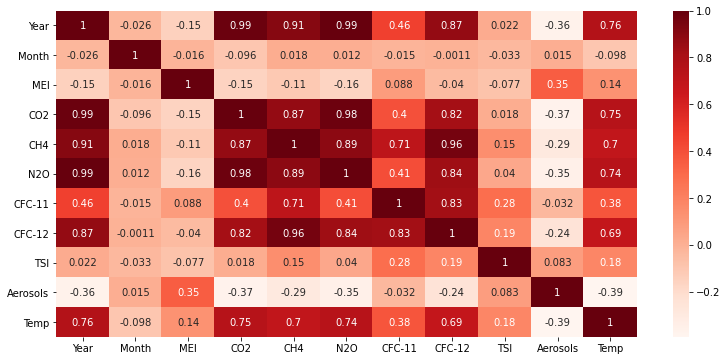

In [160]:
cor = df.corr()
plt.figure(figsize=(13, 6))
sns.heatmap(cor, annot=True, cmap=plt.cm.Reds)

Above we can see CO2, CH4, N2O, CFC-11, CFC-12 are highly correlated with other features.

###### In this problem, Temp is dependent variable and MEI, CO2, CH4, N2O, CFC-11, CFC-12, TSI, and Aerosols are independent variables. We will split the data into training set and testing set. Training data will be from year 1983 to 2006 and rest will be testing data.

In [26]:
x = climate_df.drop(['Year', 'Month', 'Temp'], axis = 1)
y = climate_df['Temp']

In [27]:
x

,MEI,CO2,CH4,N2O,CFC-11,CFC-12,TSI,Aerosols
0,2.556,345.96,1638.59,303.677,191.324,350.113,1366.1024,0.0863
1,2.167,345.52,1633.71,303.746,192.057,351.848,1366.1208,0.0794
2,1.741,344.15,1633.22,303.795,192.818,353.725,1366.2850,0.0731
3,1.130,342.25,1631.35,303.839,193.602,355.633,1366.4202,0.0673
4,0.428,340.17,1648.40,303.901,194.392,357.465,1366.2335,0.0619
...,...,...,...,...,...,...,...,...
303,-0.266,384.15,1779.88,321.405,244.200,535.072,1365.6570,0.0036
304,-0.643,383.09,1795.08,321.529,244.083,535.048,1365.6647,0.0043
305,-0.780,382.99,1814.18,321.796,244.080,534.927,1365.6759,0.0046
306,-0.621,384.13,1812.37,322.013,244.225,534.906,1365.7065,0.0048


In [28]:
y

0      0.109
1      0.118
2      0.137
3      0.176
4      0.149
       ...  
303    0.407
304    0.378
305    0.440
306    0.394
307    0.330
Name: Temp, Length: 308, dtype: float64

In [29]:
X_train, X_test, y_train, y_test = train_test_split(x, y, train_size = 0.9229, shuffle = False)
X_train

,MEI,CO2,CH4,N2O,CFC-11,CFC-12,TSI,Aerosols
0,2.556,345.96,1638.59,303.677,191.324,350.113,1366.1024,0.0863
1,2.167,345.52,1633.71,303.746,192.057,351.848,1366.1208,0.0794
2,1.741,344.15,1633.22,303.795,192.818,353.725,1366.2850,0.0731
3,1.130,342.25,1631.35,303.839,193.602,355.633,1366.4202,0.0673
4,0.428,340.17,1648.40,303.901,194.392,357.465,1366.2335,0.0619
...,...,...,...,...,...,...,...,...
279,0.759,380.45,1762.66,319.930,248.981,539.682,1365.7067,0.0041
280,0.793,378.92,1776.04,320.010,248.775,539.566,1365.8419,0.0043
281,0.892,379.16,1789.02,320.125,248.666,539.488,1365.8270,0.0044
282,1.292,380.18,1791.91,320.321,248.605,539.500,1365.7039,0.0049


In [30]:
X_test

,MEI,CO2,CH4,N2O,CFC-11,CFC-12,TSI,Aerosols
284,0.974,382.93,1799.66,320.561,248.372,539.206,1365.7173,0.0054
285,0.510,383.81,1803.08,320.571,248.264,538.973,1365.7145,0.0051
286,0.074,384.56,1803.10,320.548,247.997,538.811,1365.7544,0.0045
287,-0.049,386.40,1802.11,320.518,247.574,538.586,1365.7228,0.0045
288,0.183,386.58,1795.65,320.445,247.224,538.130,1365.6932,0.0041
289,-0.358,386.05,1781.81,320.332,246.881,537.376,1365.7616,0.0040
290,-0.290,384.49,1771.89,320.349,246.497,537.113,1365.7506,0.0040
291,-0.440,382.00,1779.38,320.471,246.307,537.125,1365.7566,0.0041
292,-1.162,380.90,1794.21,320.618,246.214,537.281,1365.7159,0.0042
293,-1.142,381.14,1802.38,320.855,246.189,537.380,1365.7388,0.0041


###### Linear regression modeling will be used for this problem. When we want to see the summary of the model like, how well fitted our data into the model, what are the significant features, how much spread is in our data, it is better to use OLS(Ordinary Least Square) model.

In [31]:
X_train = sm.add_constant(X_train)

model = sm.OLS(y_train, X_train)
result = model.fit()
print(result.summary())

                            OLS Regression Results                            
Dep. Variable:                   Temp   R-squared:                       0.751
Model:                            OLS   Adj. R-squared:                  0.744
Method:                 Least Squares   F-statistic:                     103.6
Date:                Thu, 30 Sep 2021   Prob (F-statistic):           1.94e-78
Time:                        07:15:54   Log-Likelihood:                 280.10
No. Observations:                 284   AIC:                            -542.2
Df Residuals:                     275   BIC:                            -509.4
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       -124.5943     19.887     -6.265      0.0

C:\Users\dhrup\anaconda3\lib\site-packages\statsmodels\tsa\tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


###### We can see, R squared value is 0.75 meaning data is fitted 75%. And MEI, CO2, CFC-11, CFC-12, TSI, Aerosols are significant feature giving p-value less than 0.05